In [1]:
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd

In [2]:

#https://stackoverflow.com/questions/20681297/vector-autoregressive-model-fitting-with-scikit-learn
#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
#https://blog.devgenius.io/implementing-vector-autoregression-from-scratch-with-python-b12eedbf35ad
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff

#Bayesian VAR
#https://github.com/joergrieger/pybvar

In [3]:
#RMSE loss function

In [82]:
train = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/train_copy.csv')
train_df = train.set_index('date')
#train = train.iloc[20:,:]
train_df = train_df[['BEIR','int_rate','unemp','michigan_sentiment','overall_sentiment_score','overall_attention_score','exchange_rate','commodity_index']]

In [83]:
#https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [54]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


In [55]:
#Visualising time series

In [56]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = train_df[train_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(train_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f8774719c80> (for post_execute):


KeyboardInterrupt: 

In [147]:
#Granger causality test

In [148]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

,rgnp_x,pgnp_x,ulc_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
rgnp_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
pgnp_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ulc_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


In [9]:
test_df

,T10YIE,unemp,int_rate,michigan_sentiment,overall_sentiment_score,overall_attention_score
date,,,,,,
12/05/2021,2.540000,5.5,0.06,82.9,26.4459,3.900597
13/05/2021,2.510000,5.5,0.06,82.9,51.3641,2.348224
14/05/2021,2.510000,5.5,0.06,82.9,48.4431,1.156789
15/05/2021,2.521818,5.5,0.06,82.9,17.4456,0.903695
16/05/2021,2.521818,5.5,0.06,82.9,28.1433,0.947890
...,...,...,...,...,...,...
27/05/2022,2.630000,3.4,0.83,58.4,8.4403,2.447695
28/05/2022,2.521818,3.4,0.83,58.4,18.5019,2.114690
29/05/2022,2.521818,3.4,0.83,58.4,24.0466,1.742053


In [85]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(train_df, variables = train_df.columns)  

,BEIR_x,int_rate_x,unemp_x,michigan_sentiment_x,overall_sentiment_score_x,overall_attention_score_x,exchange_rate_x,commodity_index_x
BEIR_y,1.0000,0.0011,0.0000,0.0000,0.0372,0.0007,0.0000,0.0000
int_rate_y,0.0000,1.0000,0.2503,0.3476,0.2422,0.3099,0.0092,0.0000
unemp_y,0.4906,0.8083,1.0000,0.0157,0.3611,0.7507,0.4527,0.6212
michigan_sentiment_y,0.1905,0.0000,0.2128,1.0000,0.1956,0.0000,0.0489,0.0000
overall_sentiment_score_y,0.0026,0.0000,0.0001,0.0000,1.0000,0.0000,0.0000,0.0000
overall_attention_score_y,0.0001,0.0000,0.0000,0.0000,0.0030,1.0000,0.0000,0.0000
exchange_rate_y,0.0613,0.0941,0.0517,0.3778,0.3983,0.0050,1.0000,0.0361
commodity_index_y,0.1823,0.6268,0.1510,0.8626,0.1001,0.7023,0.0151,1.0000


In [86]:
#Cointegration test

In [87]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(train_df)
#cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
BEIR   ::  140.48    > 143.6691  =>   False
int_rate ::  91.25     > 111.7797  =>   False
unemp  ::  61.07     > 83.9383   =>   False
michigan_sentiment ::  39.02     > 60.0627   =>   False
overall_sentiment_score ::  20.51     > 40.1749   =>   False
overall_attention_score ::  9.74      > 24.2761   =>   False
exchange_rate ::  3.99      > 12.3212   =>   False
commodity_index ::  0.13      > 4.1296    =>   False


In [88]:
#Train test split

In [89]:
nobs = 31
df_train, df_test = train_df[0:-nobs], train_df[-nobs:]

In [91]:
df_train
#df_test1

,BEIR,int_rate,unemp,michigan_sentiment,overall_sentiment_score,overall_attention_score,exchange_rate,commodity_index
date,,,,,,,,
01/06/2021,2.460000,0.06,6.1,82.9,48.7622,0.614764,1.224100,99.875276
02/06/2021,2.440000,0.06,6.1,82.9,14.2675,0.731967,1.221300,99.875276
03/06/2021,2.420000,0.06,6.1,82.9,37.4021,0.600170,1.212200,99.875276
04/06/2021,2.400000,0.06,6.1,82.9,38.6463,0.683259,1.217300,99.875276
05/06/2021,2.521818,0.06,6.1,82.9,36.0556,0.581084,1.216933,99.875276
...,...,...,...,...,...,...,...,...
26/04/2022,2.850000,0.33,3.3,65.2,39.1744,2.318911,1.066100,145.041207
27/04/2022,2.880000,0.33,3.3,65.2,-4.0314,2.787684,1.054900,145.041207
28/04/2022,2.970000,0.33,3.3,65.2,22.6656,3.085271,1.050000,145.041207


In [92]:
#Stationarity test

In [93]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [94]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7818
 No. Lags Chosen       = 14
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.8244. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "int_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.589
 No. Lags Chosen       = 0
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.8734. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "unemp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

In [95]:
train_df_differenced = df_train.diff().dropna()

In [96]:
for name, column in train_df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4911
 No. Lags Chosen       = 13
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "int_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -18.5712
 No. Lags Chosen       = 0
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "unemp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

In [97]:
df_train

,BEIR,int_rate,unemp,michigan_sentiment,overall_sentiment_score,overall_attention_score,exchange_rate,commodity_index
date,,,,,,,,
01/06/2021,2.460000,0.06,6.1,82.9,48.7622,0.614764,1.224100,99.875276
02/06/2021,2.440000,0.06,6.1,82.9,14.2675,0.731967,1.221300,99.875276
03/06/2021,2.420000,0.06,6.1,82.9,37.4021,0.600170,1.212200,99.875276
04/06/2021,2.400000,0.06,6.1,82.9,38.6463,0.683259,1.217300,99.875276
05/06/2021,2.521818,0.06,6.1,82.9,36.0556,0.581084,1.216933,99.875276
...,...,...,...,...,...,...,...,...
26/04/2022,2.850000,0.33,3.3,65.2,39.1744,2.318911,1.066100,145.041207
27/04/2022,2.880000,0.33,3.3,65.2,-4.0314,2.787684,1.054900,145.041207
28/04/2022,2.970000,0.33,3.3,65.2,22.6656,3.085271,1.050000,145.041207


In [98]:
train_df_differenced

,BEIR,int_rate,unemp,michigan_sentiment,overall_sentiment_score,overall_attention_score,exchange_rate,commodity_index
date,,,,,,,,
02/06/2021,-0.020000,0.0,0.0,0.0,-34.4947,0.117203,-0.002800,0.0
03/06/2021,-0.020000,0.0,0.0,0.0,23.1346,-0.131797,-0.009100,0.0
04/06/2021,-0.020000,0.0,0.0,0.0,1.2442,0.083090,0.005100,0.0
05/06/2021,0.121818,0.0,0.0,0.0,-2.5907,-0.102175,-0.000367,0.0
06/06/2021,0.000000,0.0,0.0,0.0,-5.1004,0.101130,-0.001456,0.0
...,...,...,...,...,...,...,...,...
26/04/2022,-0.060000,0.0,0.0,0.0,11.8136,0.577516,-0.004200,0.0
27/04/2022,0.030000,0.0,0.0,0.0,-43.2058,0.468773,-0.011200,0.0
28/04/2022,0.090000,0.0,0.0,0.0,26.6970,0.297586,-0.004900,0.0


In [35]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    #fig.savefig(name)
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

In [81]:
train_df_differenced.columns

Index(['BEIR', 'int_rate', 'unemp', 'michigan_sentiment',
       'reddit_sentiment_score', 'reddit_attention_score',
       'overall_sentiment_score', 'overall_attention_score', 'exchange_rate',
       'commodity_index'],
      dtype='object')

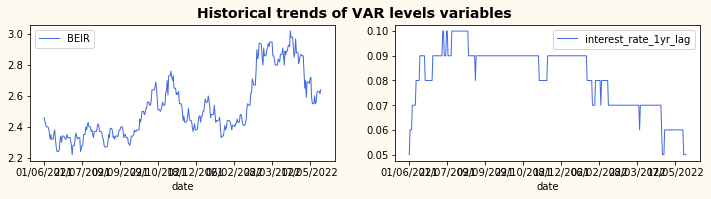

In [37]:
plot_vars(train_df, levels = ['BEIR', 'interest_rate_1yr_lag'], color="royalblue", leveltype="levels", name='levels1')

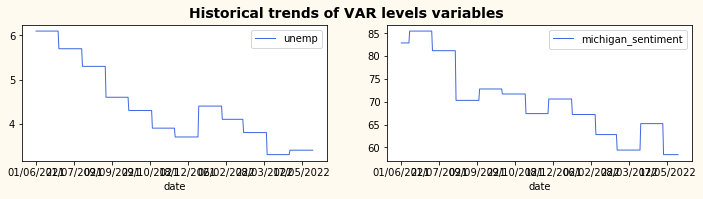

In [180]:
plot_vars(train_df, levels = ['unemp', 'michigan_sentiment'], color="royalblue", leveltype="levels", name='levels2')

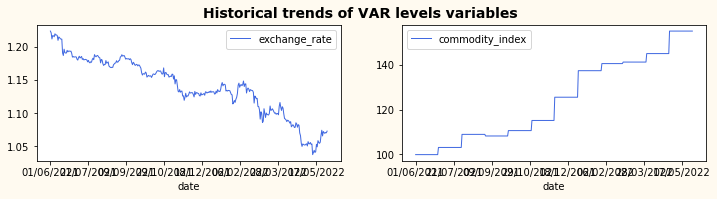

In [181]:
plot_vars(train_df, levels = ['exchange_rate', 'commodity_index'], color="royalblue", leveltype="levels", name='levels3')

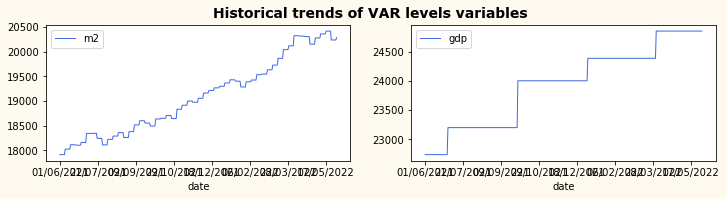

In [182]:
plot_vars(train_df, levels = ['m2', 'gdp'], color="royalblue", leveltype="levels", name='levels4')

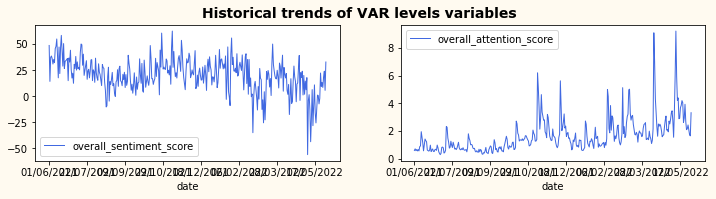

In [183]:
plot_vars(train_df, levels = ['overall_sentiment_score', 'overall_attention_score'], color="royalblue", leveltype="levels", name='levels5')

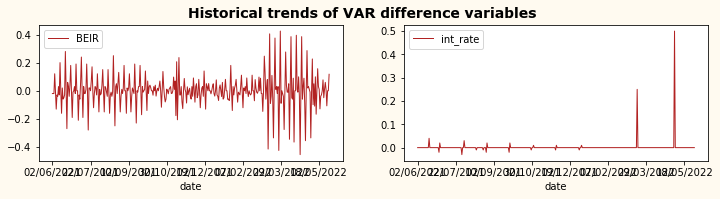

In [189]:
plot_vars(train_df_differenced, levels = ['BEIR', 'int_rate'], color="firebrick", leveltype="difference", name='difference1')

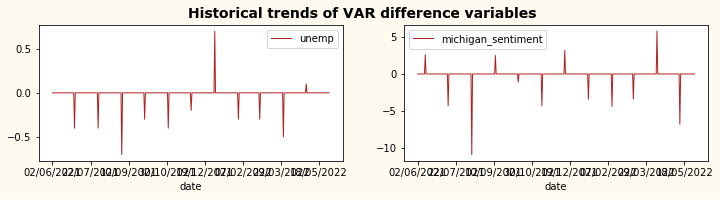

In [190]:
plot_vars(train_df_differenced, levels = ['unemp', 'michigan_sentiment'], color="firebrick", leveltype="difference", name='difference2')

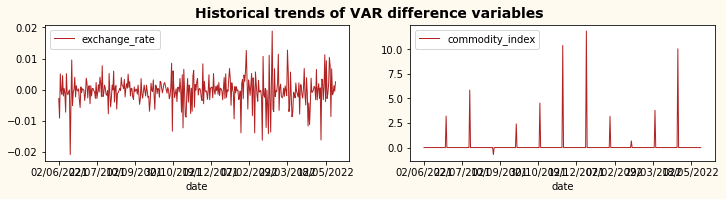

In [191]:
plot_vars(train_df_differenced, levels = ['exchange_rate', 'commodity_index'], color="firebrick", leveltype="difference", name='difference3')

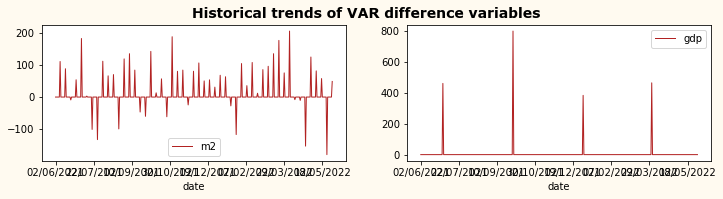

In [192]:
plot_vars(train_df_differenced, levels = ['m2', 'gdp'], color="firebrick", leveltype="difference", name='difference4')

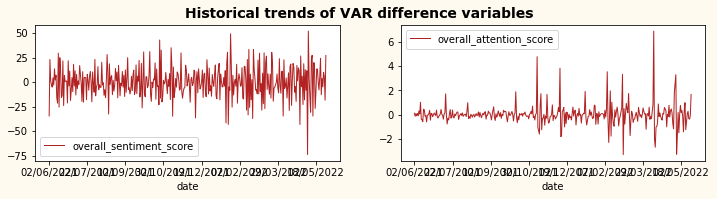

In [193]:
plot_vars(train_df_differenced, levels = ['overall_sentiment_score', 'overall_attention_score'], color="firebrick", leveltype="difference", name='difference5')

In [194]:
#Selecting appropriate lag

In [99]:
model = VAR(train_df_differenced)
for i in [1,2,3,4,5,6,7,8]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#Almost all criteria hit minimum at 2 lags

Lag Order = 1
AIC :  -23.969430574403642
BIC :  -23.144220581144644
FPE :  3.8927340106373854e-11
HQIC:  -23.64033728341327 

Lag Order = 2
AIC :  -24.092870812017733
BIC :  -22.530671116998757
FPE :  3.442813090212638e-11
HQIC:  -23.46979927142271 

Lag Order = 3
AIC :  -23.979815696578612
BIC :  -21.67733529993587
FPE :  3.861081081452172e-11
HQIC:  -23.061389676665378 

Lag Order = 4
AIC :  -23.840487590626072
BIC :  -20.794410854449605
FPE :  4.452043794647667e-11
HQIC:  -22.625320484768526 

Lag Order = 5
AIC :  -24.08932859637146
BIC :  -20.296314987987316
FPE :  3.489026832626312e-11
HQIC:  -22.576023313931486 

Lag Order = 6
AIC :  -24.15307854502346
BIC :  -19.609762376853055
FPE :  3.298765140802874e-11
HQIC:  -22.340227402853372 

Lag Order = 7
AIC :  -23.962084491048806
BIC :  -18.66507465698985
FPE :  4.036566265315385e-11
HQIC:  -21.848269103573674 

Lag Order = 8
AIC :  -23.707095563212395
BIC :  -17.652975271484813
FPE :  5.285997401431193e-11
HQIC:  -21.290886731069882

/Users/aashrit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aashrit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [100]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Aug, 2022
Time:                     10:55:43
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -22.5307
Nobs:                     331.000    HQIC:                  -23.4698
Log likelihood:           366.021    FPE:                3.44281e-11
AIC:                     -24.0929    Det(Omega_mle):     2.30623e-11
--------------------------------------------------------------------
Results for equation BEIR
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              0.003702         0.005962            0.621           0.535
L1.BEIR                           -0.070750         0.051735           -1.368           0.171
L1.int_ra

In [101]:
#Checking for serial correlation#
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train_df_differenced.columns, out):
    print(str(col), ':', round(val, 2))

BEIR : 2.02
int_rate : 1.98
unemp : 2.01
michigan_sentiment : 2.02
overall_sentiment_score : 2.08
overall_attention_score : 2.07
exchange_rate : 1.87
commodity_index : 2.0


In [102]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced.values[-lag_order:]
forecast_input

2


array([[-9.00000000e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.66410000e+00, -1.01031087e+00,
         3.70000000e-03,  0.00000000e+00],
       [-3.58181818e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.01900000e+00,  3.32723980e-02,
        -8.33333000e-04,  0.00000000e+00]])

In [103]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=train_df.index[-nobs:], columns=train_df.columns + '_1d')
df_forecast

,BEIR_1d,int_rate_1d,unemp_1d,michigan_sentiment_1d,overall_sentiment_score_1d,overall_attention_score_1d,exchange_rate_1d,commodity_index_1d
date,,,,,,,,
01/05/2022,0.053523,0.002074,-0.015934,-0.110037,2.811624,0.102871,-0.001752,0.153559
02/05/2022,0.151622,0.002132,-0.021152,0.021539,-1.341302,-0.202143,-0.001578,0.051251
03/05/2022,-0.035026,0.000191,-0.004570,0.012972,-0.838459,0.059865,0.000318,0.122055
04/05/2022,-0.064676,0.000170,-0.003265,-0.082686,0.214222,0.093498,0.000334,0.166261
05/05/2022,0.023474,0.001169,-0.010728,-0.090993,0.285959,-0.037916,-0.001067,0.144028
06/05/2022,0.027942,0.001080,-0.010912,-0.031075,0.107458,-0.023527,-0.000868,0.124078
07/05/2022,-0.012465,0.000636,-0.007201,-0.039136,-0.313731,0.026311,-0.000161,0.132870
08/05/2022,-0.010032,0.000712,-0.007548,-0.066926,-0.074192,0.012246,-0.000351,0.142269
09/05/2022,0.007795,0.000917,-0.009217,-0.057146,0.177689,-0.004030,-0.000662,0.137850


In [104]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [105]:
df_results = invert_transformation(df_train1, df_forecast, second_diff=False)

KeyError: 'interest_rate_1yr_lag_1d'

In [106]:
df_results
#.iloc[:,6:]

,overall_sentiment_score_1d,overall_attention_score_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,overall_sentiment_score_forecast,overall_attention_score_forecast,BEIR_forecast,interest_rate_1yr_lag_forecast,commodities_1yr_lag_forecast,UNRATENSA_1yr_lag_forecast,UMCSENT_2wk_lag_forecast,WM2NS_1yr_lag_forecast
date,,,,,,,,,,,,,,,,
01/05/2022,-0.365031,-0.144129,0.005034,0.000832,-0.132823,-0.038366,-0.066756,8.074831,23.655469,1.964103,2.885034,0.050832,144.908384,5.661634,65.133244,20158.274831
02/05/2022,-0.010385,0.035642,0.001165,-0.000110,0.158021,-0.014768,-0.047242,6.059887,23.645084,1.999745,2.886199,0.050721,145.066405,5.646866,65.086001,20164.334719
03/05/2022,0.000999,-0.002728,0.001305,-0.000015,0.131231,-0.016860,-0.054794,6.846168,23.646083,1.997017,2.887504,0.050706,145.197636,5.630006,65.031208,20171.180887
04/05/2022,0.008121,0.005130,0.001342,-0.000026,0.134919,-0.016626,-0.053142,6.735531,23.654204,2.002147,2.888846,0.050680,145.332555,5.613380,64.978066,20177.916418
05/05/2022,0.000412,0.003909,0.001321,-0.000024,0.134334,-0.016654,-0.053485,6.758886,23.654616,2.006055,2.890167,0.050656,145.466889,5.596726,64.924581,20184.675304
06/05/2022,0.004014,0.004066,0.001326,-0.000025,0.134467,-0.016654,-0.053420,6.752523,23.658631,2.010122,2.891493,0.050631,145.601355,5.580072,64.871161,20191.427827
07/05/2022,0.002601,0.004053,0.001325,-0.000025,0.134434,-0.016653,-0.053432,6.754269,23.661232,2.014174,2.892818,0.050606,145.735790,5.563419,64.817729,20198.182096
08/05/2022,0.003127,0.004050,0.001325,-0.000025,0.134443,-0.016653,-0.053430,6.753763,23.664359,2.018225,2.894144,0.050581,145.870232,5.546766,64.764299,20204.935859
09/05/2022,0.002936,0.004053,0.001325,-0.000025,0.134440,-0.016653,-0.053430,6.753923,23.667295,2.022277,2.895469,0.050556,146.004672,5.530113,64.710869,20211.689783


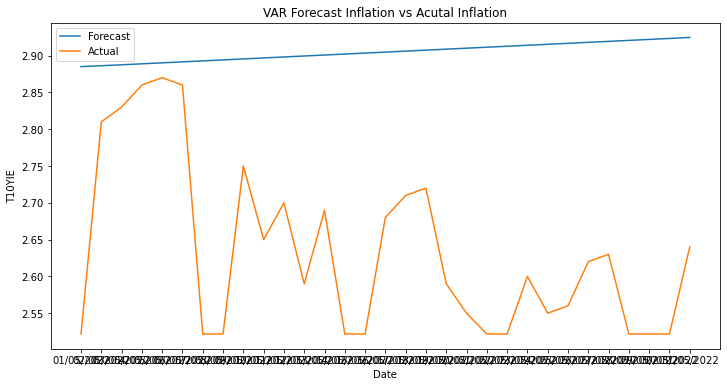

In [107]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [108]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [109]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test1['BEIR'], squared = False)

0.24503386002267502

### LASSO Approach

In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')

In [132]:
train_df
#df_test1

,BEIR,int_rate,unemp,michigan_sentiment,overall_sentiment_score,overall_attention_score,exchange_rate,commodity_index
date,,,,,,,,
01/06/2021,2.460000,0.06,6.1,82.9,48.7622,0.614764,1.224100,99.875276
02/06/2021,2.440000,0.06,6.1,82.9,14.2675,0.731967,1.221300,99.875276
03/06/2021,2.420000,0.06,6.1,82.9,37.4021,0.600170,1.212200,99.875276
04/06/2021,2.400000,0.06,6.1,82.9,38.6463,0.683259,1.217300,99.875276
05/06/2021,2.521818,0.06,6.1,82.9,36.0556,0.581084,1.216933,99.875276
...,...,...,...,...,...,...,...,...
27/05/2022,2.630000,0.83,3.4,58.4,8.4403,2.447695,1.070900,155.100579
28/05/2022,2.521818,0.83,3.4,58.4,18.5019,2.114690,1.069733,155.100579
29/05/2022,2.521818,0.83,3.4,58.4,24.0466,1.742053,1.071044,155.100579


In [144]:
X_train = df_train1[['overall_sentiment_score','overall_attention_score','interest_rate_1yr_lag','commodities_1yr_lag','UNRATENSA_1yr_lag','UMCSENT_2wk_lag','WM2NS_1yr_lag']]
y_train = df_train1.iloc[:,2]
X_test = df_test1[['overall_sentiment_score','overall_attention_score','interest_rate_1yr_lag','commodities_1yr_lag','UNRATENSA_1yr_lag','UMCSENT_2wk_lag','WM2NS_1yr_lag']]
y_test = df_test1.iloc[:,2]

In [148]:
def train_test_plot(model, X_train, X_test):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,4))
    colors = sns.color_palette("deep", 8)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("BEIR vs. Model's BEIR")
    ax.set_ylabel("BEIR")
    ax.legend(["Forecasted BEIR","Actual BEIR"])
    

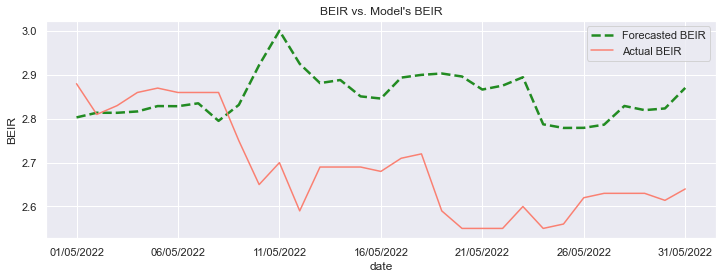

In [149]:
lasso = linear_model.LassoCV(cv=model_selection.TimeSeriesSplit(n_splits=5), 
                             alphas=None, tol = 10000, normalize=True) 

lasso = lasso.fit(X_train, y_train)
optimal_alpha = lasso.alpha_

lasso2 = linear_model.Lasso(alpha=optimal_alpha, normalize=True)
lasso2.fit(X_train, y_train)

train_test_plot(lasso2, X_train, X_test) 

In [150]:
metrics.mean_squared_error(y_test, lasso2.predict(X_test), squared = False)

0.20741567326475183

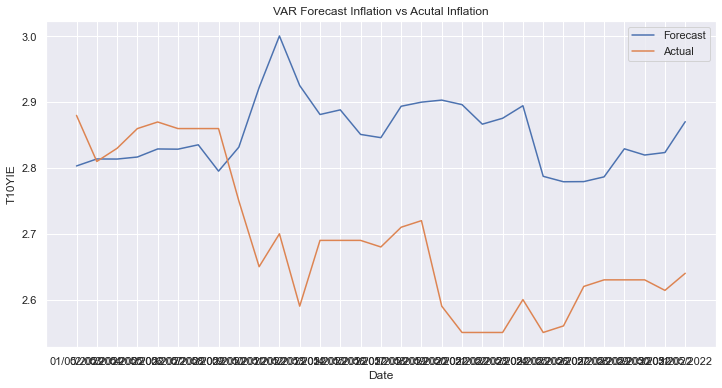

In [151]:
plt.figure(figsize=(12,6))
plt.plot(df_results.index, lasso2.predict(X_test), label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, y_test, label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [152]:
lasso_coefs = pd.DataFrame({"features":list(X_train), "coef": lasso2.coef_})
lasso_coefs = lasso_coefs[lasso_coefs.coef != 0.0]
lasso_coefs.sort_values("coef", ascending=False)

,features,coef
1,overall_attention_score,0.020990
5,UMCSENT_2wk_lag,0.001027
6,WM2NS_1yr_lag,0.000410
0,overall_sentiment_score,-0.000297
3,commodities_1yr_lag,-0.012380
4,UNRATENSA_1yr_lag,-0.022133
2,interest_rate_1yr_lag,-5.263494


### XGBoost

In [153]:
#!pip install xgboost
from xgboost import XGBRegressor, plot_importance

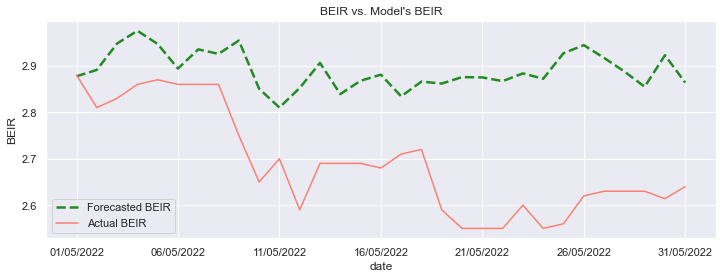

In [154]:
# Build XGBoost
# Normalize the features 
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

train_test_plot(model=xgb, X_train=X_train_scaled, X_test=X_test_scaled)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

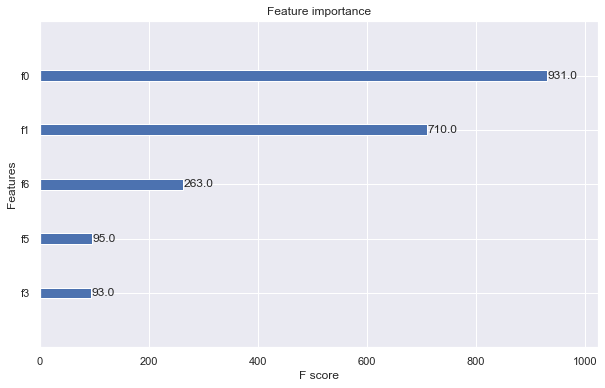

In [155]:
fig_xgb, ax_xgb = plt.subplots(figsize=(10,6))
plot_importance(xgb, max_num_features=5, ax=ax_xgb)

In [156]:
# Feature selection

for i, name in dict(zip(list(range(len(X_train.columns))), list(X_train.columns.values))).items():
    if i == 0:
        print(f"Feature {i} is {name}")
    elif i == 1:
        print(f"Feature {i} is {name}")
    elif i == 6:
        print(f"Feature {i} is {name}")
    elif i == 5:
        print(f"Feature {i} is {name}")
    elif i == 3:
        print(f"Feature {i} is {name}")

Feature 0 is overall_sentiment_score
Feature 1 is overall_attention_score
Feature 3 is commodities_1yr_lag
Feature 5 is UMCSENT_2wk_lag
Feature 6 is WM2NS_1yr_lag


In [157]:
metrics.mean_squared_error(y_test, xgb.predict(X_test), squared = False)

0.11225194940177796

In [ ]:
#Overall, traditional method performs best - then XGBoost then LASSO
#Although LASSO and XGBoost agree that unemp, int_rate, michigan_sentiment,
#and overall_attention_score are most important, they both perform worse than 
#the traditional, vanilla VAR model that also includes overall_sentiment_score